In [ ]:
# default_exp utils

# Utility Functions
> Various utilities.

In [ ]:
#hide
from nbdev.showdoc import *

## Declaring Version Information

Simple methods to grab and state libraries you are using. (From WalkWithFastAi.com)

In [ ]:
#export
from importlib_metadata import version
def get_version(lib:str):
    "Returns version of `lib`"
    return version(lib)

In [ ]:
#export
from IPython.display import Markdown
def state_versions(libs:list=[]):
    "State all the versions currently installed from `libs` in Markdown"
    cell = 'Below are the versions of '
    for i, lib in enumerate(libs):
        if len(libs) == 1: cell += f'`{str(lib)}`'
        elif i < len(libs)-1:
            cell += ''.join(f'`{str(lib)}`')
            if len(libs) > 2: cell += ', '
            else: cell += ' '
        elif len(libs) > 1: cell += ''.join(f'and `{str(lib)}`')
    cell += ' currently running at the time of writing this:\n'
    cell += ''.join([
        f'* `{str(lib)}`: {get_version(str(lib))} \n'
    for lib in libs])
    cell += '---'
    return Markdown(cell)

Example usage:

In [ ]:
state_versions(['fastai', 'torch', 'torchvision'])

Below are the versions of `fastai`, `torch`, and `torchvision` currently running at the time of writing this:
* `fastai`: 2.3.1 
* `torch`: 1.7.1 
* `torchvision`: 0.8.2 
---

In [ ]:
#export
import fastai
from fastai.vision.all import *
@typedispatch
def get_mean_color(i:TensorImage): return torch.Tensor.float(i).mean(2).mean(1)/255
@typedispatch
def get_mean_color(i:PILImage): return get_mean_color(ToTensor()(i))

In [ ]:
#export
@typedispatch
def show_mean_color(i:TensorImage):
    color = get_mean_color(i)
    dummy = torch.ones((32,32,3))
    dummy[:,:]=color
    show_titled_image([TensorImage(dummy.permute(2,0,1) ), list((color.numpy()*255).astype(int))])
@typedispatch
def show_mean_color(i:PILImage):
    show_mean_color(ToTensor()(i))

In [ ]:
pets_path = untar_data(URLs.PETS)/"images"
pets_files  = get_image_files(pets_path)

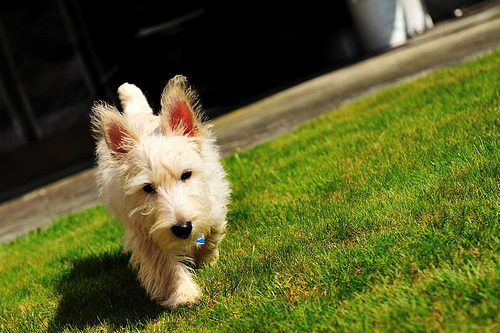

In [ ]:
img = PILImage.create(pets_files[0])
img

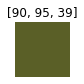

In [ ]:
show_mean_color(ToTensor()(img))

# Export

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_core.ipynb.
Converted 01_utils.ipynb.
Converted index.ipynb.
